In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Evaluation-Gem5-Sheet2.csv")

In [4]:
data.rename(columns = {'1K-DDR':'DDR_1K', '1K-PIM':'PIM_1K', 
                    '64K-DDR':'DDR_64K', '64-PIM':'PIM_64K','8M-DDR':'DDR_8M','8M-PIM':'PIM_8M',
                    '16M-DDR':'DDR_16M', '16M-PIM':'PIM_16M'}, inplace = True) 

In [5]:
data

,Attributes,DDR_1K,PIM_1K,DDR_64K,PIM_64K,DDR_8M,PIM_8M,DDR_16M,PIM_16M
0,system.cpu.icache.overall_accesses::total,5358522139,15347760,3504842214,289471,3477037278,18435,3478235619,17552
1,system.cpu.dcache.overall_accesses::total,2057118048,4267030,1402846452,85546,1393633883,6754,1394642150,6500
2,system.l2.overall_accesses::total,177505,78968,195809,2124,656597,976,787569,972
3,system.l2.overall_miss_latency::total,75718672000,188911,241607000,302589000,63361096000,138696000,75718672000,138024000
4,system.membus.reqLayer0.occupancy,38061000,746970,2648000,21220,2560568000,9750,3346463000,9710
5,system.membus.respLayer0.occupancy,200853000,3734850,14032250,106100,3516965500,48750,4205852500,48550
6,system.cpu.numCycles,14837992589,50067922,9820261536,1058629,9806673267,191867,9823836979,188911
7,system.l2.overall_hits::total,139444,4271,193161,2,3,1,3,1
8,system.l2.overall_misses::total,38061,74697,2648,2122,656594,975,787566,971
9,system.membus.power_state.pwrStateResidencyTicks,14837992589000,14627377074000,9820261536000,9645178818000,9806673267000,9620959362000,9823836979000,9636310402000


In [6]:
plt.rcParams['figure.figsize'] = (12,9)
workloads = ['1K','64K','8M','16M']

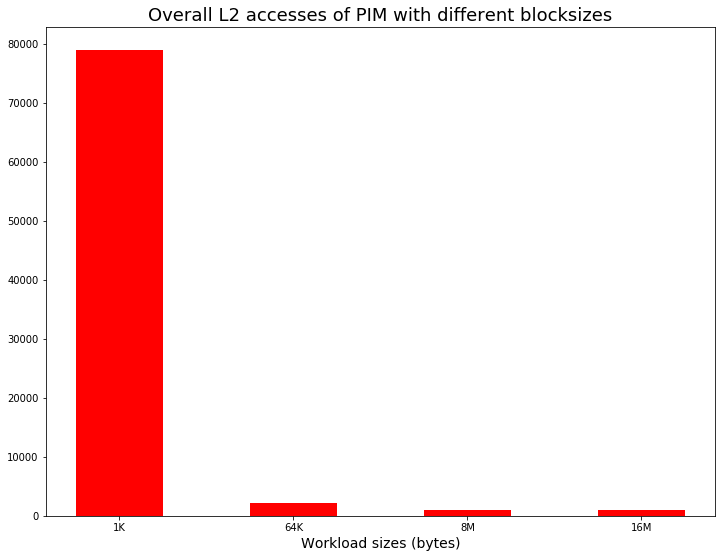

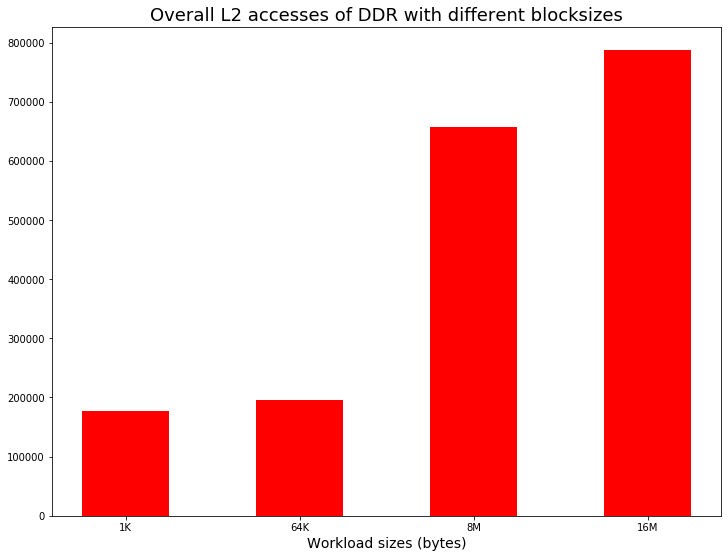

In [7]:
#BAR GRAPHS

#Overall L2 accesses

li = data.loc[data["Attributes"]=="system.l2.overall_accesses::total"]
for index, rows in li.iterrows(): 
    l2_accesses = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, l2_accesses[1::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 accesses of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
plt.show()

plt.bar(workloads, l2_accesses[::2], color ='red', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 accesses of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
plt.show()

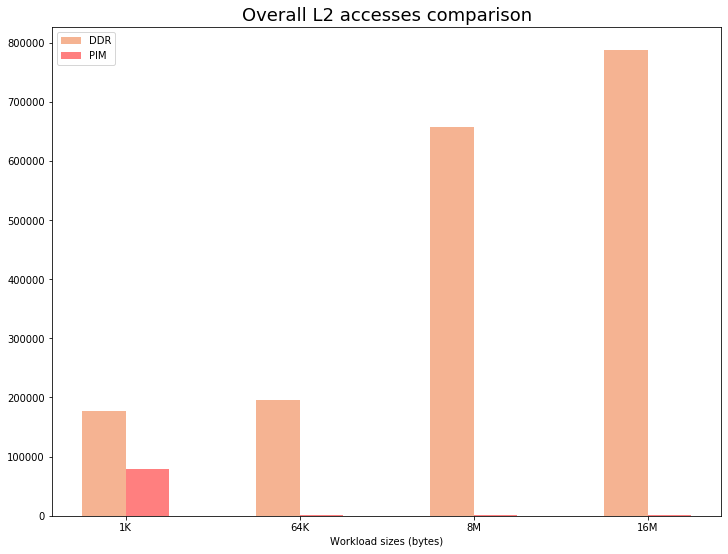

In [8]:
#GROUPED BAR GRAPHS
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, l2_accesses[::2], width, alpha=0.5, color='#EC6927') 
plt.bar([p + width for p in pos], l2_accesses[1::2], width, alpha=0.5, color='#FF0000') 

ax.set_title('Overall L2 accesses comparison', fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Workload sizes (bytes)')
# plt.grid()
plt.show()

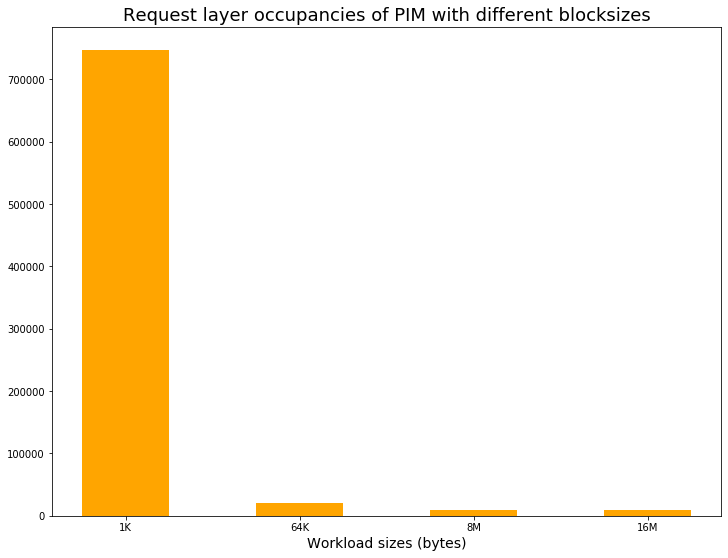

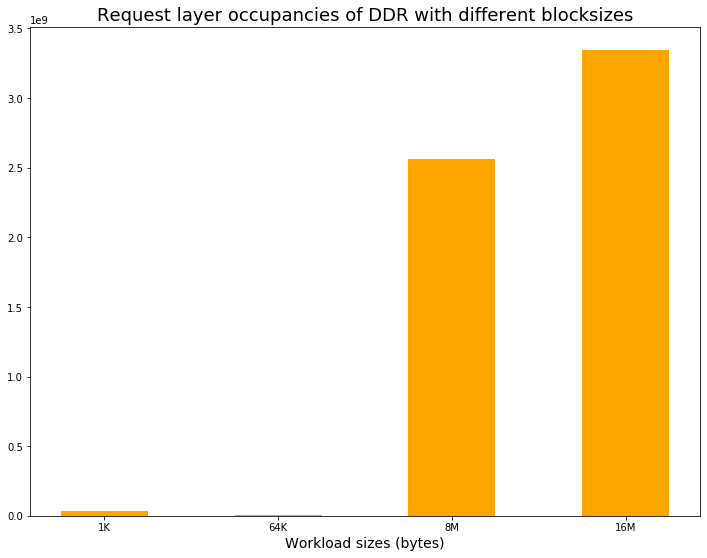

In [9]:
#Request layer occupancies
li = data.loc[data["Attributes"]=="system.membus.reqLayer0.occupancy"]
for index, rows in li.iterrows(): 
    reqlayer_occ = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, reqlayer_occ[1::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Request layer occupancies of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

plt.bar(workloads, reqlayer_occ[::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Request layer occupancies of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

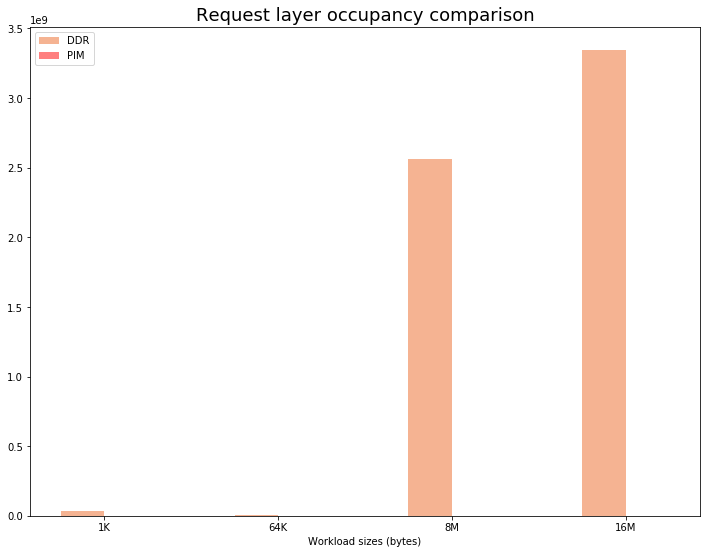

In [10]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, reqlayer_occ[::2], width, alpha=0.5, color='#EC6927') 
plt.bar([p + width for p in pos], reqlayer_occ[1::2], width, alpha=0.5, color='#FF0000') 

ax.set_title('Request layer occupancy comparison', fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Workload sizes (bytes)')
# plt.grid()
plt.show()

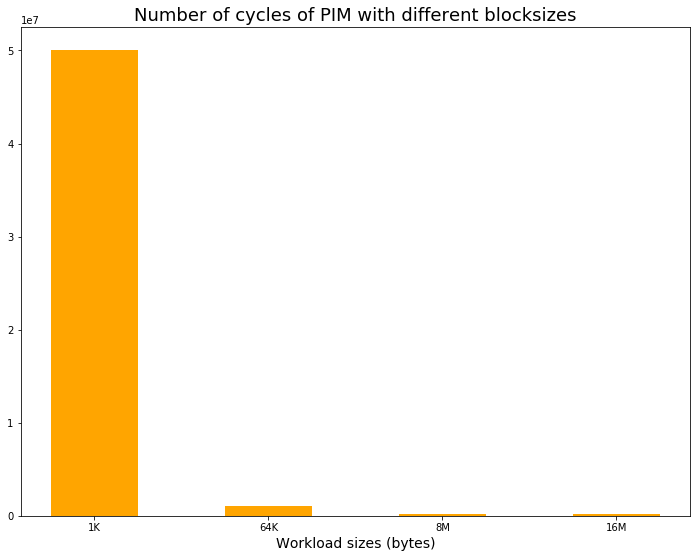

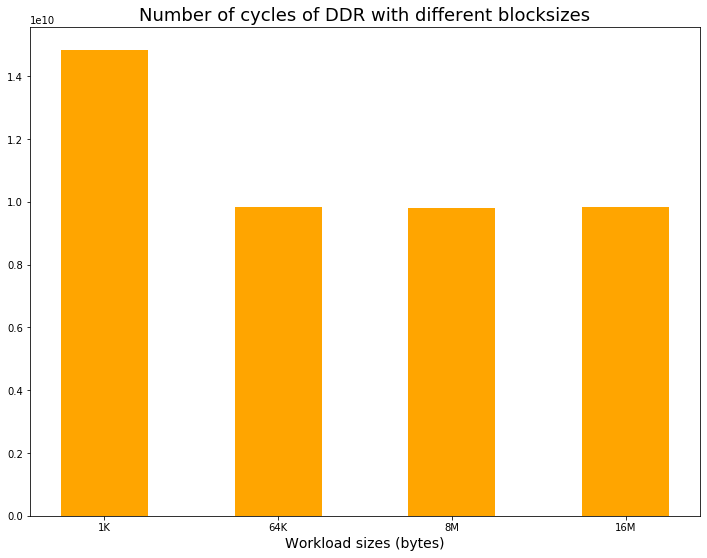

In [11]:
li = data.loc[data["Attributes"]=="system.cpu.numCycles"]
for index, rows in li.iterrows(): 
    num_cycles = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, num_cycles[1::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Number of cycles of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

plt.bar(workloads, num_cycles[::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Number of cycles of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

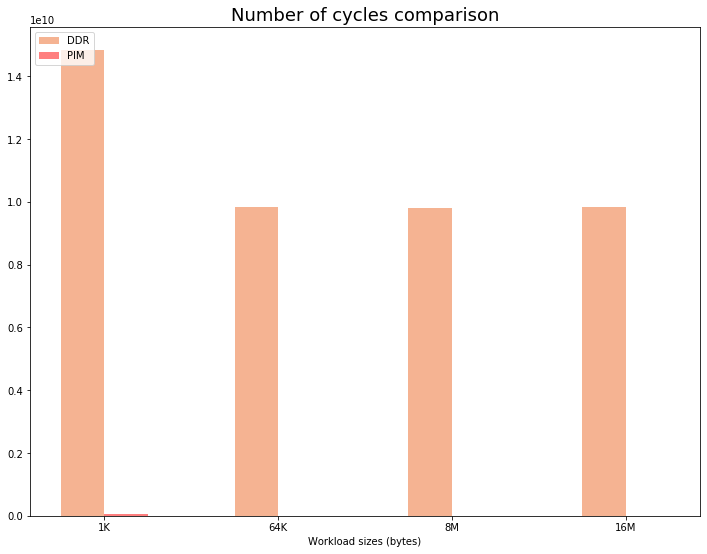

In [12]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, num_cycles[::2], width, alpha=0.5, color='#EC6927') 
plt.bar([p + width for p in pos], num_cycles[1::2], width, alpha=0.5, color='#FF0000') 

ax.set_title('Number of cycles comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Workload sizes (bytes)')
# plt.grid()
plt.show()

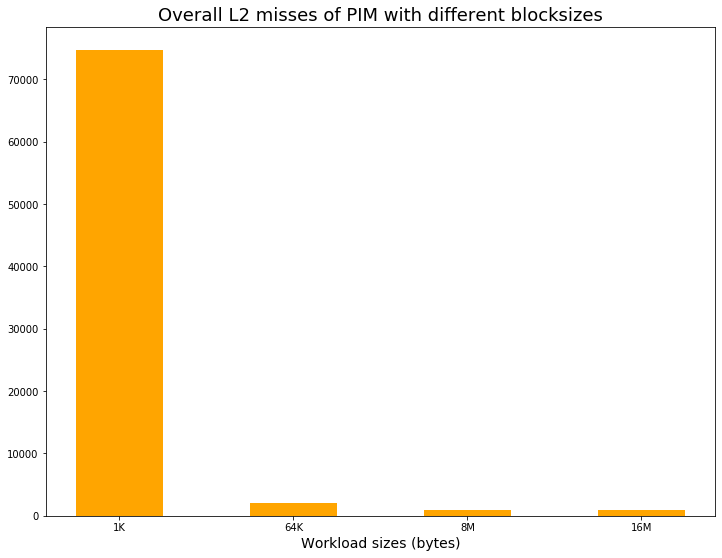

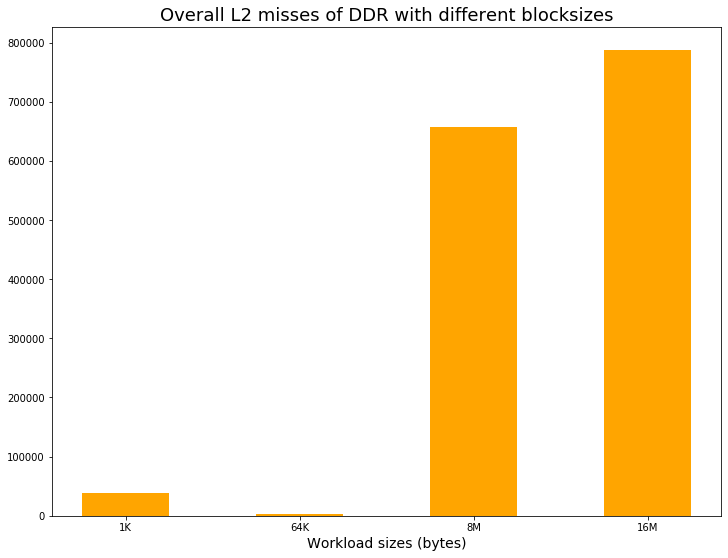

In [13]:
li = data.loc[data["Attributes"]=="system.l2.overall_misses::total"]
for index, rows in li.iterrows(): 
    ovr_misses = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, ovr_misses[1::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 misses of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

plt.bar(workloads, ovr_misses[::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 misses of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

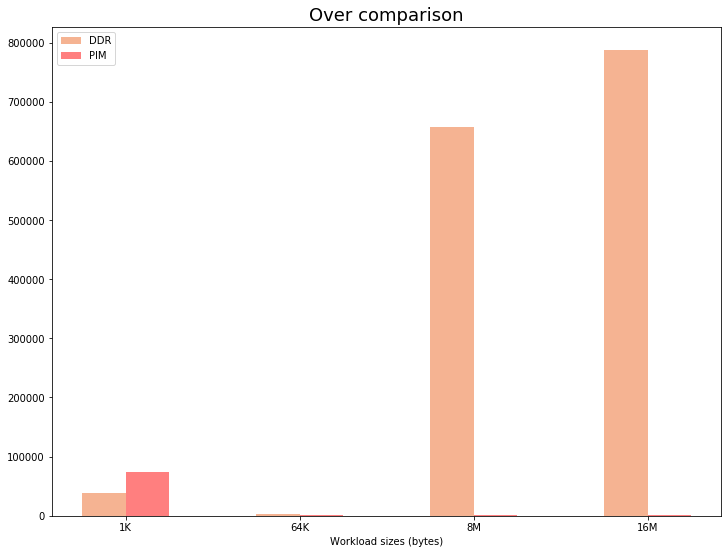

In [14]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, ovr_misses[::2], width, alpha=0.5, color='#EC6927') 
plt.bar([p + width for p in pos], ovr_misses[1::2], width, alpha=0.5, color='#FF0000') 

ax.set_title('Over comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Workload sizes (bytes)')
# plt.grid()
plt.show()

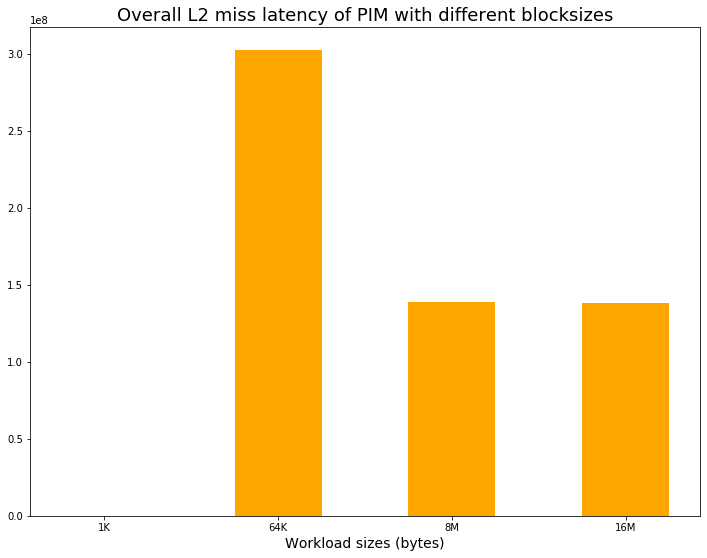

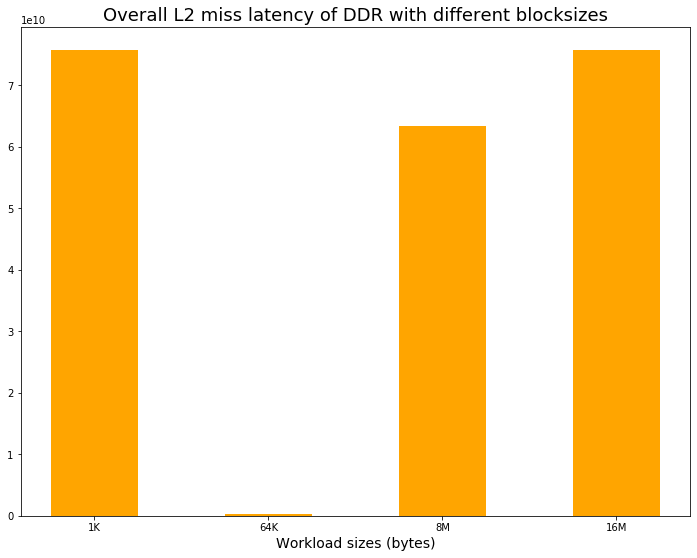

In [15]:
li = data.loc[data["Attributes"]=="system.l2.overall_miss_latency::total"]
for index, rows in li.iterrows(): 
    l2_misslat = [rows.DDR_1K, rows.PIM_1K, rows.DDR_64K, rows.PIM_64K, 
                  rows.DDR_8M, rows.PIM_8M, rows.DDR_16M, rows.PIM_16M]
    
plt.bar(workloads, l2_misslat[1::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 miss latency of PIM with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

plt.bar(workloads, l2_misslat[::2], color ='orange', width = 0.5)
plt.xticks([0,1,2,3])
plt.title("Overall L2 miss latency of DDR with different blocksizes", fontsize=18) 
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.grid(True)
plt.show()

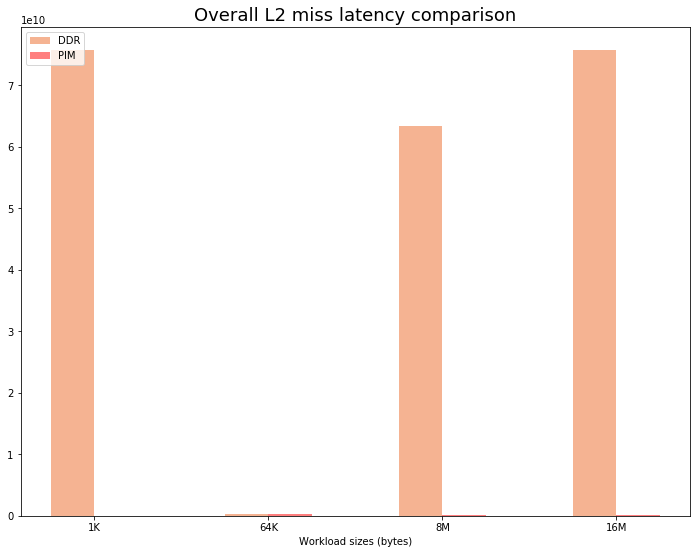

In [16]:
pos = list(range(4)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12,9))
plt.bar(pos, l2_misslat[::2], width, alpha=0.5, color='#EC6927') 
plt.bar([p + width for p in pos], l2_misslat[1::2], width, alpha=0.5, color='#FF0000') 

ax.set_title('Overall L2 miss latency comparison',fontsize=18)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(workloads)

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Workload sizes (bytes)')
# plt.grid()
plt.show()